In [1]:
import wandb

import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
bankA_df = pd.read_csv("BankA.csv")
bankB_df = pd.read_csv("BankB.csv")
bankC_df = pd.read_csv("BankC.csv")

In [7]:
bankA_df.replace("?", np.nan, inplace=True)
print(f"Shape: {bankA_df.shape}")

bankB_df.replace("?", np.nan, inplace=True)
print(f"Shape: {bankB_df.shape}")

bankC_df.replace("?", np.nan, inplace=True)
print(f"Shape: {bankC_df.shape}")

Shape: (226456, 15)
Shape: (402923, 15)
Shape: (170620, 15)


In [ ]:
bankA_df.info()

In [ ]:
bankA_df.describe().T

In [ ]:
bankB_df.info()

In [ ]:
bankB_df.describe().T

In [6]:
bankC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170620 entries, 0 to 170619
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   institute        170620 non-null  object
 1   age              170620 non-null  int64 
 2   workclass        170620 non-null  object
 3   education        170620 non-null  object
 4   educational-num  170620 non-null  int64 
 5   marital-status   170620 non-null  object
 6   occupation       170620 non-null  object
 7   relationship     170620 non-null  object
 8   race             170620 non-null  object
 9   gender           170620 non-null  object
 10  capital-gain     170620 non-null  int64 
 11  capital-loss     170620 non-null  int64 
 12  hours-per-week   170620 non-null  int64 
 13  native-country   170620 non-null  object
 14  income           170620 non-null  object
dtypes: int64(5), object(10)
memory usage: 19.5+ MB


In [ ]:
bankC_df.describe().T

In [ ]:
bankA_df.head(20)

In [ ]:
bankB_df.head(20)

In [ ]:
bankC_df.head(20)

In [8]:
bankA_df.isnull().sum()

institute              0
age                    0
workclass          10078
education              0
educational-num        0
marital-status         0
occupation         10116
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country      4905
income                 0
dtype: int64

In [9]:
bankB_df.isnull().sum()

institute              0
age                    0
workclass          24039
education              0
educational-num        0
marital-status         0
occupation         24203
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country      6403
income                 0
dtype: int64

In [10]:
bankC_df.isnull().sum()

institute              0
age                    0
workclass          13196
education              0
educational-num        0
marital-status         0
occupation         13359
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country      3095
income                 0
dtype: int64

In [11]:
import missingno as mn

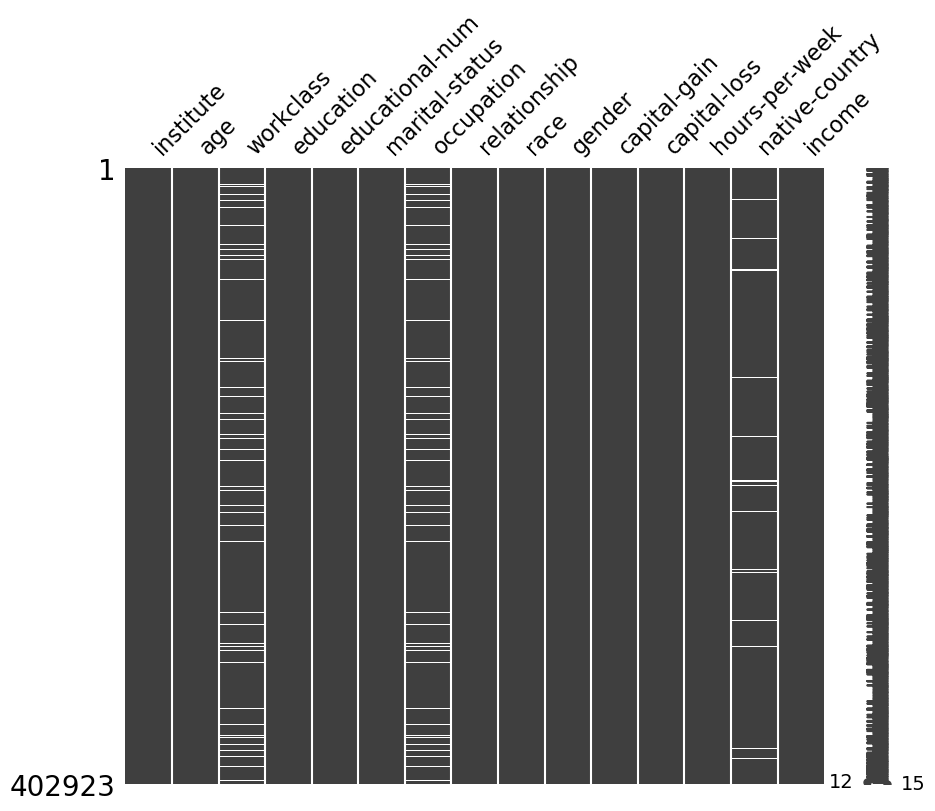

In [12]:
mn.matrix(bankB_df,figsize=(10,8));

In [14]:
bankA_copy = bankA_df.copy(deep=True)

In [ ]:
bankB_copy.isnull().sum()

In [15]:
def impute_nan_mode(df, column, mode):
    df[column] = df[column].fillna(mode)
    return df

mode_val = bankA_copy[bankA_copy.workclass.notna()]['workclass'].mode()[0]


bankA_copy_noNull = impute_nan_mode(bankA_copy, 'workclass', mode_val)


In [16]:
bankA_copy_noNull['workclass']

0                  Private
1                  Private
2         Self-emp-not-inc
3              Federal-gov
4                  Private
                ...       
226451    Self-emp-not-inc
226452         Federal-gov
226453             Private
226454             Private
226455             Private
Name: workclass, Length: 226456, dtype: object

In [17]:
bankA_copy_noNull.isnull().sum()

institute              0
age                    0
workclass              0
education              0
educational-num        0
marital-status         0
occupation         10116
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country      4905
income                 0
dtype: int64

# Data Exploration

In [18]:
def impute_nan_mode_multiple(df, columns):
    for column in columns:
        mode = df[column].mode()[0]  # Modus für die Spalte berechnen
        df[column] = df[column].fillna(mode)  # NaN-Werte mit Modus ersetzen
    return df


In [19]:
bankB_copy = bankB_df.copy(deep=True)

In [20]:
columns_to_impute = ['workclass', 'occupation', 'native-country']
bankB_copy = impute_nan_mode_multiple(bankB_copy, columns_to_impute)
bankB_copy.isnull().sum()

institute          0
age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [21]:
bankB_df.isnull().sum()

institute              0
age                    0
workclass          24039
education              0
educational-num        0
marital-status         0
occupation         24203
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country      6403
income                 0
dtype: int64

In [23]:
bank_clean = pd.read_csv("BankA_Clean.csv")
bank_clean.isnull().sum()

age                               0
education-num                     0
capital-gain                      0
capital-loss                      0
hours-per-week                    0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 97, dtype: int64

In [24]:
bank_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226456 entries, 0 to 226455
Data columns (total 97 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age                                        226456 non-null  float64
 1   education-num                              226456 non-null  float64
 2   capital-gain                               226456 non-null  float64
 3   capital-loss                               226456 non-null  float64
 4   hours-per-week                             226456 non-null  float64
 5   income                                     0 non-null       float64
 6   education_11th                             226456 non-null  float64
 7   education_12th                             226456 non-null  float64
 8   education_1st-4th                          226456 non-null  float64
 9   education_5th-6th                          226456 non-null  float64
 10  educatio

In [25]:
adult = pd.read_csv("adult_train.csv")
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        32561 non-null  float64
 1   fnlwgt                                     32561 non-null  float64
 2   education-num                              32561 non-null  float64
 3   capital-gain                               32561 non-null  float64
 4   capital-loss                               32561 non-null  float64
 5   hours-per-week                             32561 non-null  float64
 6   income                                     32561 non-null  float64
 7   education_11th                             32561 non-null  float64
 8   education_12th                             32561 non-null  float64
 9   education_1st-4th                          32561 non-null  float64
 10  education_5th-6th     